In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pymap3d as pm
import random

In [2]:
# Secondo giorno
bag = "range"
lat0 = 40.901282 # deg
lon0 = 12.960685 # deg
h0   = 0.0     # meters

init = pm.geodetic2ned(40.904522, 12.961190, 0, lat0, lon0, h0)
anch_1 = pm.geodetic2ned(40.90419, 12.96163, 0, lat0, lon0, h0)
anch_2 = pm.geodetic2ned(40.9041, 12.96131, 0, lat0, lon0, h0)
anch_3 = pm.geodetic2ned(40.90445, 12.96101, 0, lat0, lon0, h0)
anch_4 = pm.geodetic2ned(40.90472, 12.96118, 0, lat0, lon0, h0)

In [3]:
data_gps = pd.read_csv("../bagfiles/"+bag+"_gps.csv")

In [4]:
data_range = pd.read_csv("../bagfiles/"+bag+"_range.csv")

In [5]:
xt = []
yt = []

state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
for gps in state_num:
    n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
    xt.append(e)
    yt.append(n)
xt = np.array(xt)
yt = np.array(yt)

In [6]:
gps_path    = np.array([yt, xt]).T
t_gps       = np.array(data_gps["%time"])
t_gps       = t_gps.reshape((t_gps.shape[0],1))
ranges_1_gt = np.linalg.norm(gps_path - anch_1[:2], axis=1)
ranges_2_gt = np.linalg.norm(gps_path - anch_2[:2], axis=1)
ranges_3_gt = np.linalg.norm(gps_path - anch_3[:2], axis=1)
ranges_4_gt = np.linalg.norm(gps_path - anch_4[:2], axis=1)

In [7]:
ranges_1   = data_range.loc[data_range["field.node"] == 1]
ranges_2   = data_range.loc[data_range["field.node"] == 2] 
ranges_3   = data_range.loc[data_range["field.node"] == 3] 
ranges_4   = data_range.loc[data_range["field.node"] == 4] 
t_1        = np.array(ranges_1["%time"])
t_1        = t_1.reshape((1,t_1.shape[0]))
t_2        = np.array(ranges_2["%time"])
t_2        = t_2.reshape((1,t_2.shape[0]))
t_3        = np.array(ranges_3["%time"])
t_3        = t_3.reshape((1,t_3.shape[0]))
t_4        = np.array(ranges_4["%time"])
t_4        = t_4.reshape((1,t_4.shape[0]))

In [8]:
idx_1 = np.abs(t_1-t_gps).argmin(axis=0)
idx_2 = np.abs(t_2-t_gps).argmin(axis=0)
idx_3 = np.abs(t_3-t_gps).argmin(axis=0)
idx_4 = np.abs(t_4-t_gps).argmin(axis=0)

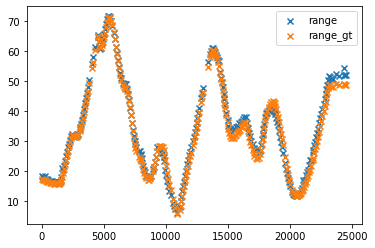

In [9]:
plt.cla()
plt.scatter(idx_3, ranges_3["field.distance"],marker='x')
plt.scatter(idx_3, ranges_3_gt[idx_3],marker='x')
plt.legend(["range", "range_gt"])
plt.show()


<AxesSubplot:>

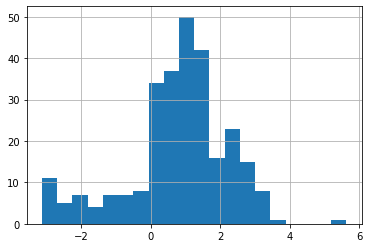

In [10]:
error = ranges_3["field.distance"] - ranges_3_gt[idx_3]
error.hist(bins=20)

<AxesSubplot:>

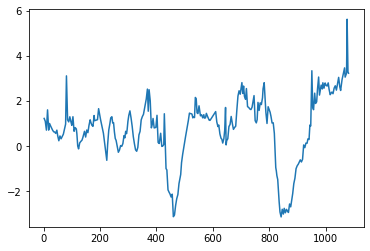

In [11]:
error.plot()

In [12]:
r = np.random.normal(size=200)

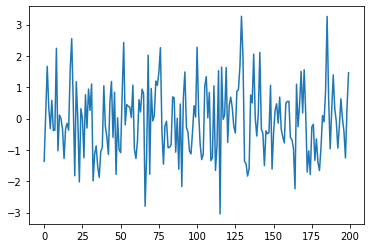

In [13]:
plt.plot(r)